# Data Engineering Capstone Project by Ilya Labotskiy 12-1 DE Eastern 

Homers Choice is a one-stop home improvement store for all your needs. We offer a wide selection of top brand tools and supplies for both the professionals and the do-it-yourselfers. We have everything you need to make sure your job is done right, from paints and stains to plumbing supplies and power tools. Homer's Choice strives to be your first choice.

# Business Flow Chart

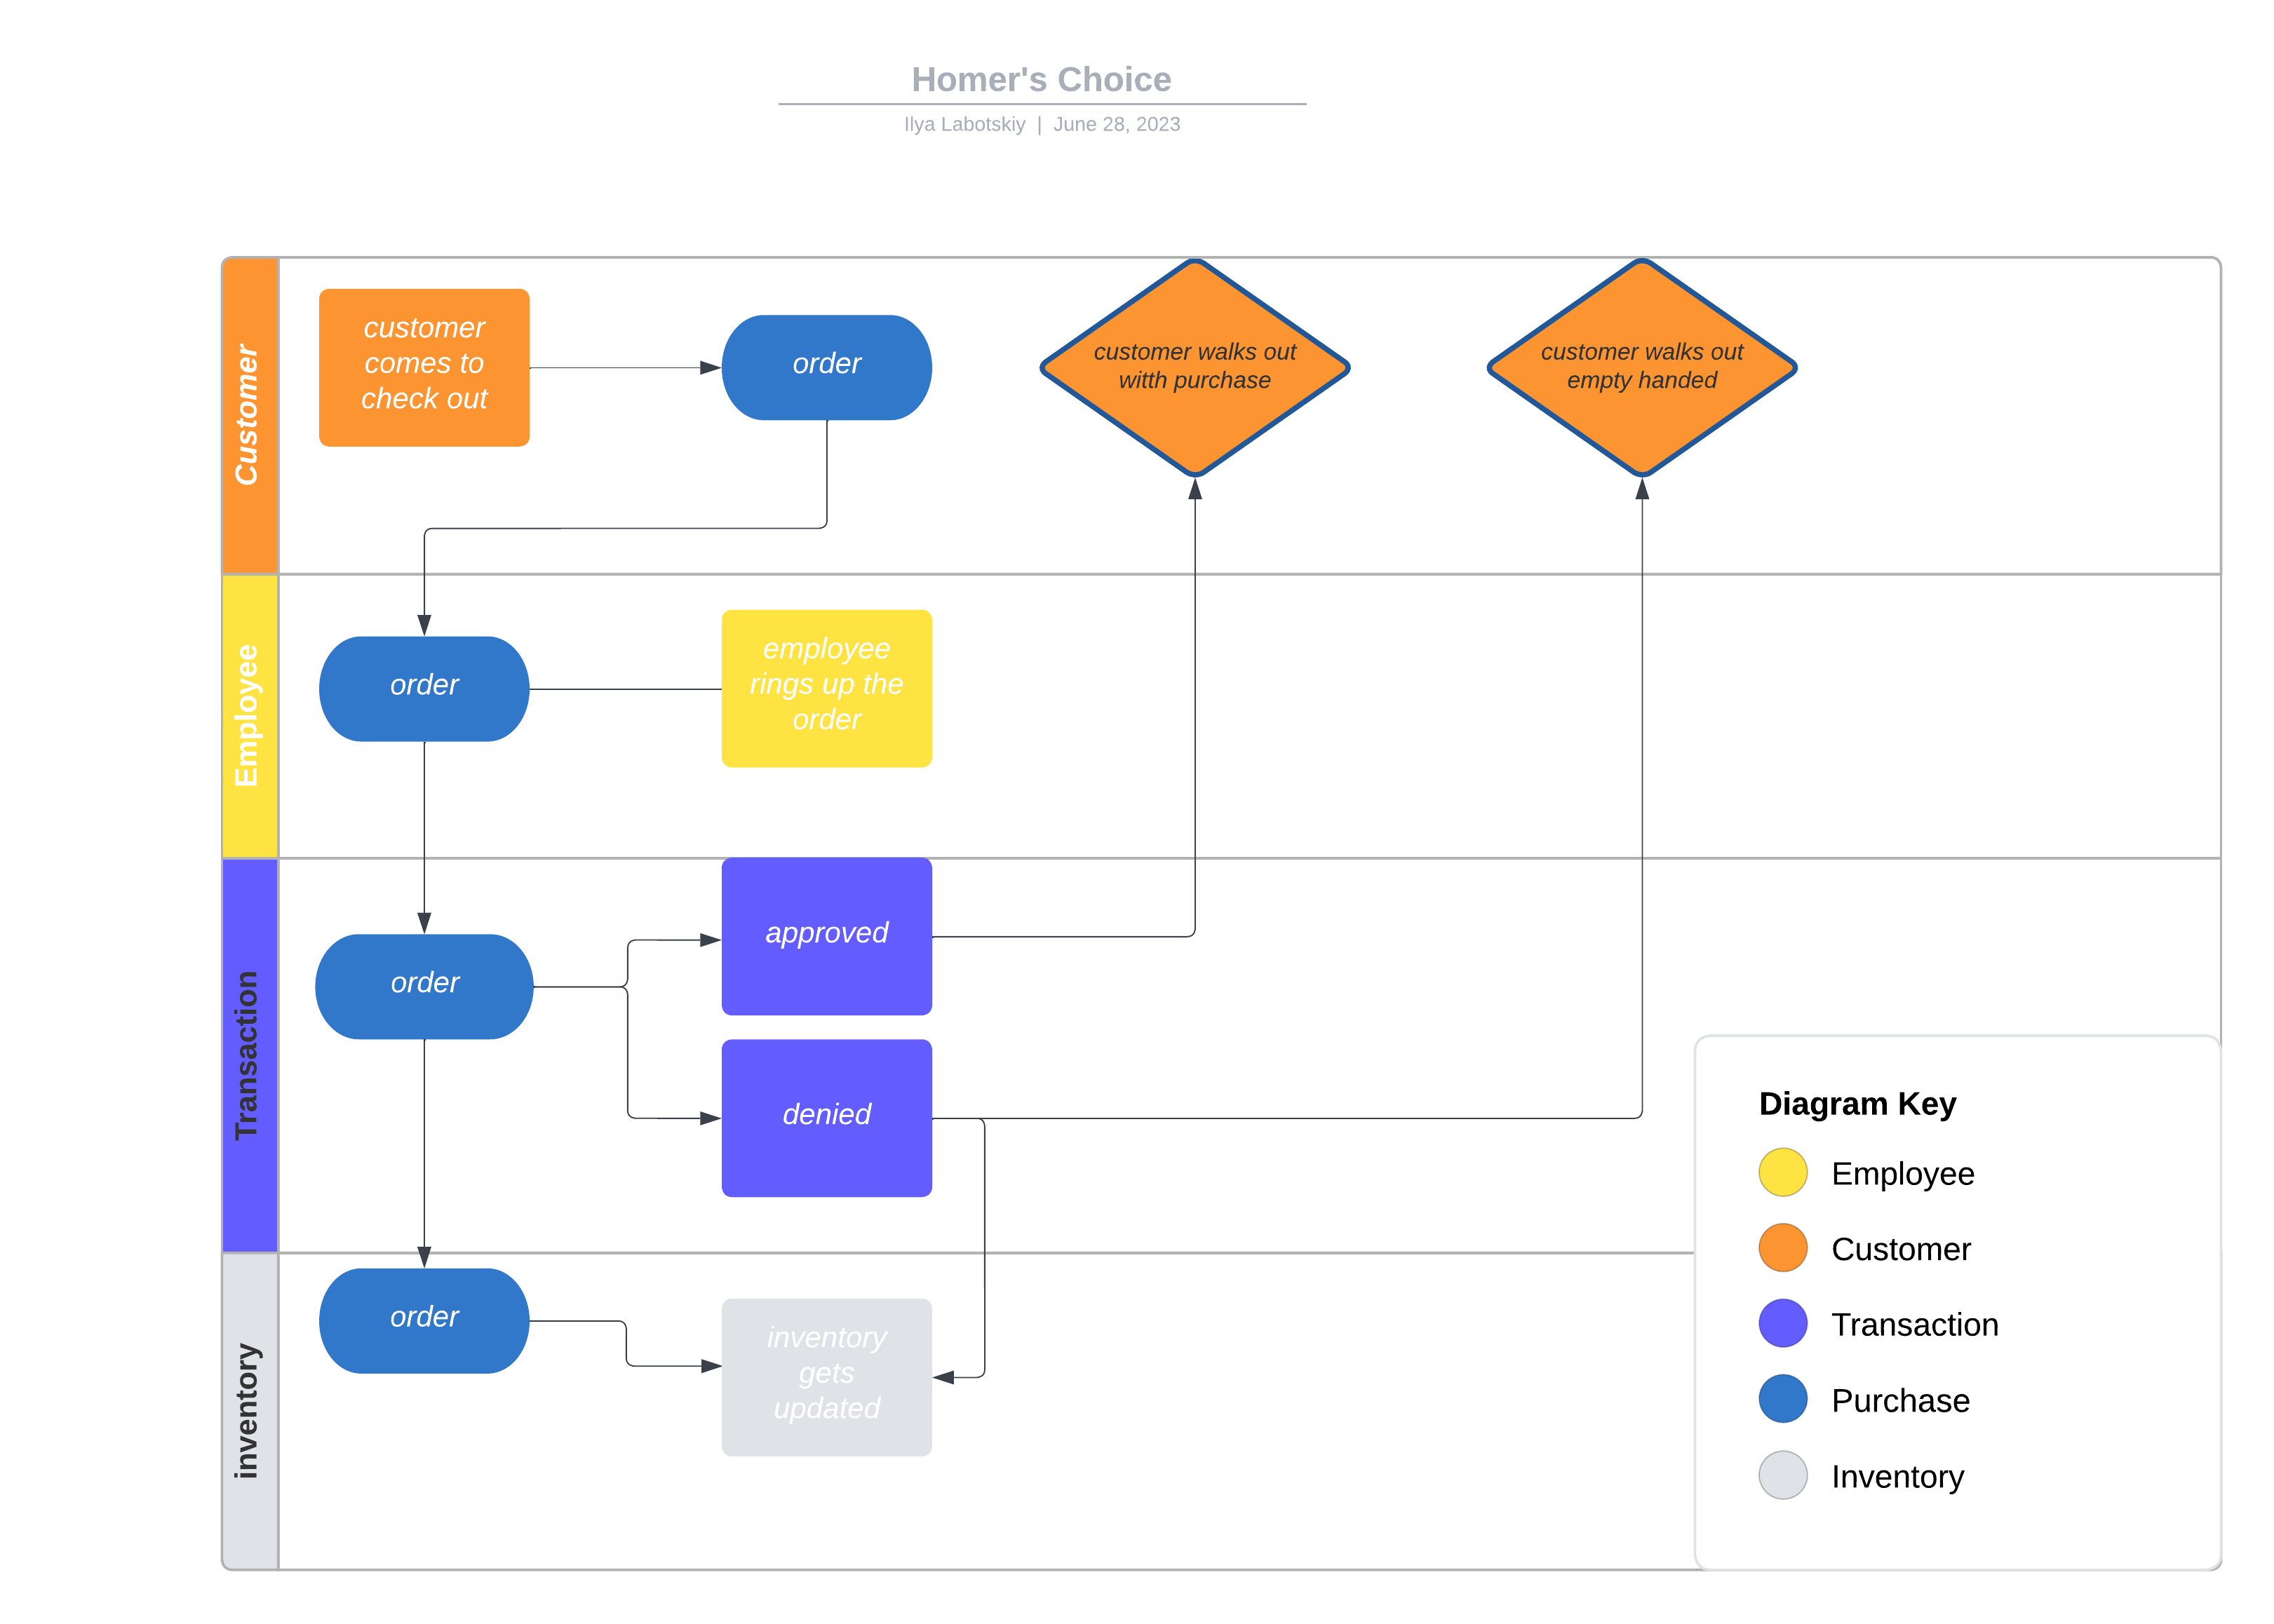

# ERD Diagram

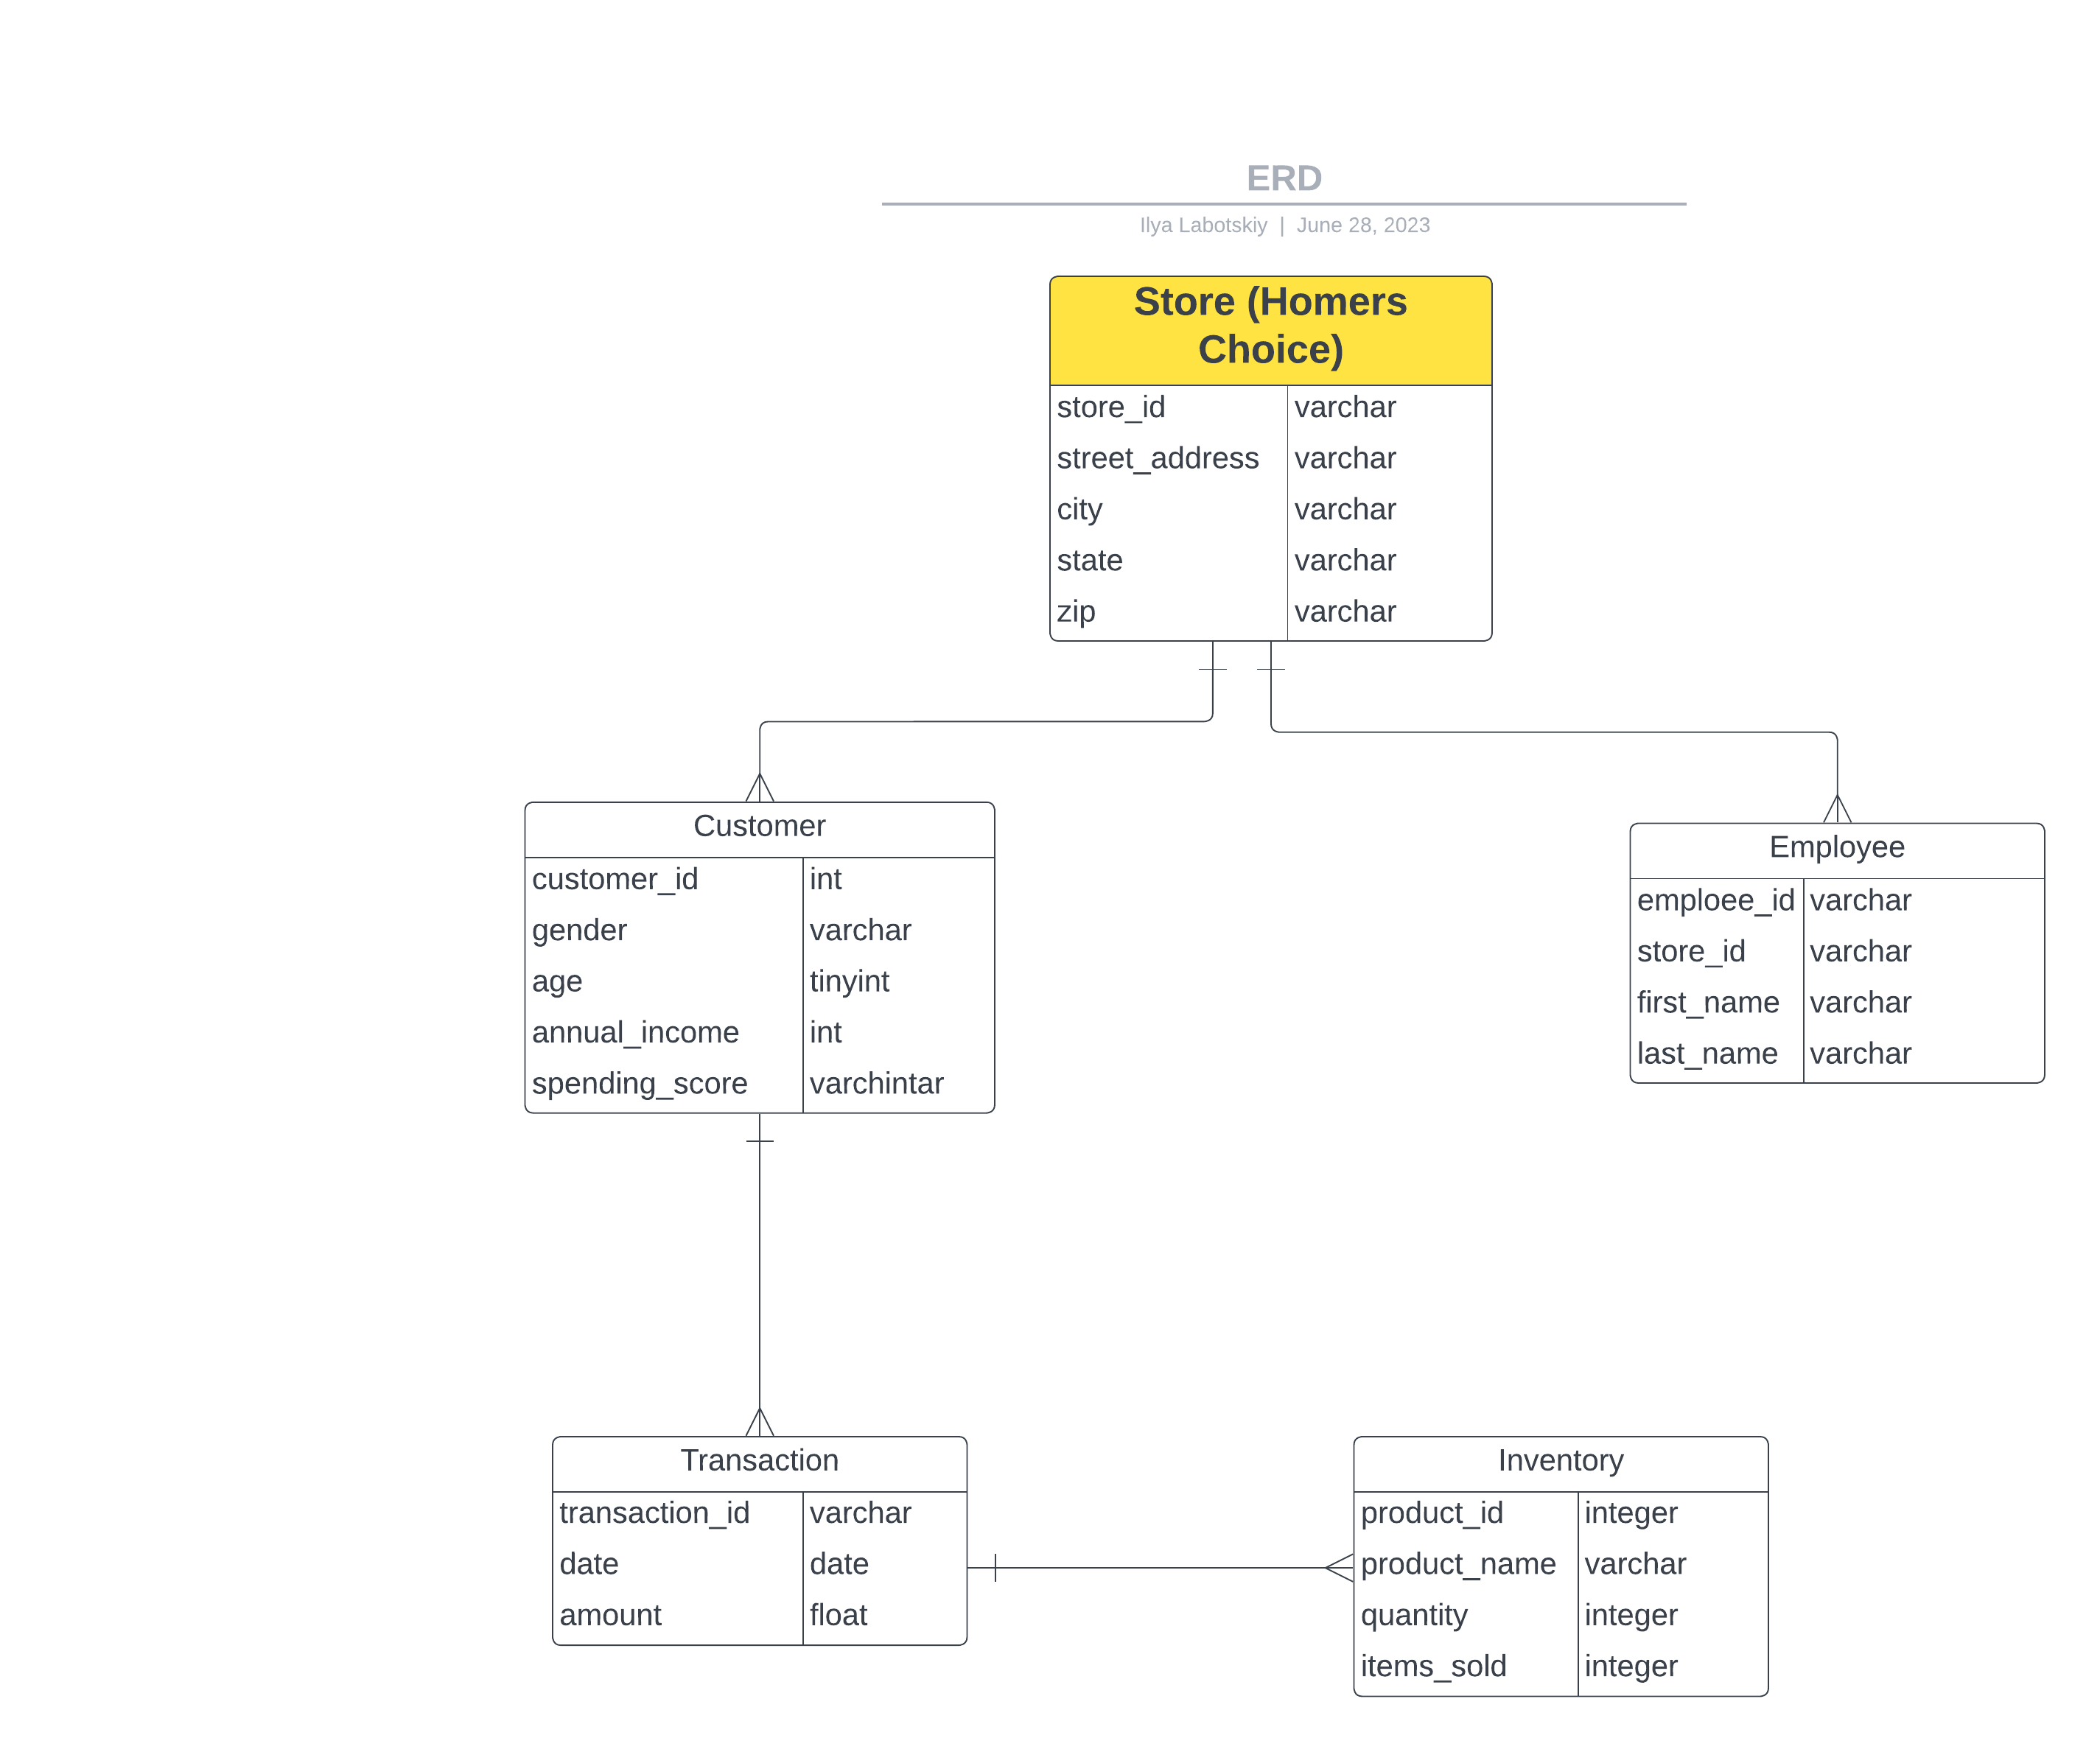

# Homer's Choice Database DDL 

Tables had to be created in the Amazon Relational Database Service so that they could be transfered to the S3 bucket.

In [ ]:
CREATE TABLE `Customer` (
  `customer_id` integer,
  `first_name` varchar (100),
  `last_name` varchar (100),
  `street_address` varchar (100),
  `phone_number` varchar (100),
  `state` varchar (100),
  `email` varchar (100),
  `zip` varchar (100),
  `city ` varchar (100)
);

CREATE TABLE `Employee` (
  `emploee_id` integer,
  `store_id` integer,
  `first_name` varchar (100),
  `last_name` varchar (100)
);

CREATE TABLE `Inventory` (
  `product_id` integer,
  `product_name` varchar (100),
  `quantity` integer,
  `items_sold` integer
);

CREATE TABLE `Store (Homers Choice)` (
  `store_id` integer,
  `street_address` varchar (100),
  `city` varchar (100),
  `state` varchar (100),
  `zip` varchar (100)
);

CREATE TABLE `Transaction` (
  `transaction_id` integer,
  `date` timestamp,
  `amount` varchar (100)
);



# Found customer data on Kaggle 

In [5]:
https://www.kaggle.com/datasets/shwetabh123/mall-customers

# Store data 

This code shows how the fake store data was generated. 

In [ ]:
import pandas as pd
from faker import Faker
import random

stores = []


def fake_data_generation(records):
    fake = Faker('en_US')

    for i in range(records):
        store_id = random.randint(1, 10000)

        # Generate data
        store_address = fake.address()
        city = fake.city()
        state = fake.state_abbr()
        zip_code = fake.postcode()

        stores.append({"store_id": store_id, "address": store_address, "city": city, "state": state, "zip": zip_code})

    stores_df = pd.DataFrame(stores)
    store_table = stores_df.to_csv(r"C:\Users\labot\Downloads\stores.csv", index=False)


fake_data_generation(500)   

# Employee data 

This code shows how fake employee data was generated. 

In [ ]:
import random
import string
import pandas as pd
from faker import Faker


# function to create randomized employee data
def fake_data_generation(records):
    fake= Faker('en_US')
    employee = []


    employee_id_list = [random.randint(1, 1000) for _ in range(records)]
    store_id_list = [random.randint(1, 100) for _ in range(records)]
    first_name_list = [fake.first_name() for _ in range(records)]
    last_name_list = [fake.last_name() for _ in range(records)]
    employee.append({'employee_id': employee_id_list,
                   'store_id': store_id_list,
                   'first_name': first_name_list,
                   'last_name': last_name_list })

    employee_df = pd.DataFrame(fake_data_generation(500))
    employee_table = employee_df.to_csv(r"C:\Users\labot\Downloads\employee.csv", index=False)

# Inventory data 

This code shows how the fake inventory data was generated. 

In [ ]:
import pandas as pd
from faker import Faker

def fake_data_generation(records):
    fake = Faker('en_US')

    products = []

    for i in range(records):
        product_name = fake.word()
        quantity = fake.random_int(min=1, max=100)

        products.append({
            "product_id": fake.uuid4(),
            "product_name": product_name,
            "quantity": quantity,
            "items_sold": fake.random_int(min=0, max=quantity)
        })

    return products

products_df = pd.DataFrame(fake_data_generation(500))
products_table = products_df.to_csv(r"C:\Users\labot\Downloads\inventory.csv", index=False)

# Transactions data 

In [ ]:
This code shows how the fake transactions data was generated. 

In [ ]:
import pandas as pd
from faker import Faker

def fake_transaction_generation(records):
    fake = Faker('en_US')

    transactions = []

    for i in range(records):
        transactions.append({
            "transaction_id": fake.random_int(min=10000, max=99999),
            "date": fake.date(),
            "amount":fake.random_int(min=1, max=10000)
        })

    return transactions

transaction_df = pd.DataFrame(fake_transaction_generation(500))
transaction_table = transaction_df.to_csv(r"C:\Users\labot\Downloads\transactions.csv", index=False)

#  AWS Glue Jobs 

CSV files for the mock business had to be converted to Parquet files so that they could be put in the Redshift Data Warehouse.

# Customers file converted

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="labotskiy-capstone",
    table_name="customers",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("customerid", "long", "customerid", "long"),
        ("genre", "string", "genre", "string"),
        ("age", "long", "age", "long"),
        ("`annual income (k$)`", "long", "`annual income (k$)`", "long"),
        ("`spending score (1-100)`", "long", "`spending score (1-100)`", "long"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://labotskiy-capstone/capstone-parquet/",
        "partitionKeys": [],
    },
    format_options={"compression": "uncompressed"},
    transformation_ctx="S3bucket_node3",
)

job.commit()


# Employee file converted

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="labotskiy-capstone",
    table_name="employee",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("employee_id", "string", "employee_id", "string"),
        ("store_id", "long", "store_id", "long"),
        ("first_name", "string", "first_name", "string"),
        ("last_name", "string", "last_name", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://labotskiy-capstone/capstone-parquet/",
        "partitionKeys": [],
    },
    format_options={"compression": "uncompressed"},
    transformation_ctx="S3bucket_node3",
)

job.commit()


# Store file converted

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="labotskiy-capstone",
    table_name="store",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("store_id", "long", "store_id", "long"),
        ("address", "string", "address", "string"),
        ("city", "string", "city", "string"),
        ("state", "string", "state", "string"),
        ("zip", "long", "zip", "long"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://labotskiy-capstone/capstone-parquet/",
        "partitionKeys": [],
    },
    transformation_ctx="S3bucket_node3",
)

job.commit()


# Inventory file converted

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="labotskiy-capstone",
    table_name="inventory",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("product_id", "string", "product_id", "string"),
        ("product_name", "string", "product_name", "string"),
        ("quantity", "long", "quantity", "long"),
        ("items_sold", "long", "items_sold", "long"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={
        "path": "s3://labotskiy-capstone/capstone-parquet/",
        "partitionKeys": [],
    },
    format_options={"compression": "uncompressed"},
    transformation_ctx="S3bucket_node3",
)

job.commit()


# Transactions file converted

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="labotskiy-capstone",
    table_name="transactions",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("transaction_id", "long", "transaction_id", "varchar"),
        ("date", "string", "date", "string"),
        ("amount", "long", "amount", "varchar"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://labotskiy-capstone", "partitionKeys": []},
    format_options={"compression": "uncompressed"},
    transformation_ctx="S3bucket_node3",
)

job.commit()


# Redshift Data Warehouse DDL

In [ ]:
This script was used to create the Homer's Choice Data Warehouse. 

In [ ]:
create external schema capstone
from data catalog
database 'dev'
iam_role 'arn:aws:iam::701187063124:role/Redshift-Capstone'
create external database if not exists;

CREATE EXTERNAL TABLE capstone.customers (
  customerid varchar(100),
  gender varchar(100),
  age varchar(100),
  annual_income varchar(100),
  spending_score varchar(100)
)
STORED AS PARQUET
LOCATION 's3://labotskiy-capstone/capstone-parquet/customers/';

SELECT * FROM "dev"."capstone"."customers";

CREATE EXTERNAL TABLE capstone.employees (
  employeeid varchar(100),
  storeid varchar(100),
  firstname varchar(100),
  lastname varchar(100)
 )
STORED AS PARQUET
LOCATION 's3://labotskiy-capstone/capstone-parquet/employees/';

SELECT * FROM "dev"."capstone"."employees";

CREATE EXTERNAL TABLE capstone.store (
  storeid varchar(100),
  address varchar(100),
  city varchar(100),
  state varchar(100),
  zip varchar(100)
 )
STORED AS PARQUET
LOCATION 's3://labotskiy-capstone/capstone-parquet/store/';

SELECT * FROM "dev"."capstone"."store";

CREATE EXTERNAL TABLE capstone.inventory (
  productid varchar(100),
  productname varchar(100),
  quantity varchar(100),
  itemssold varchar(100)
 )
STORED AS PARQUET
LOCATION 's3://labotskiy-capstone/capstone-parquet/inventory/';

SELECT * FROM "dev"."capstone"."inventory";

CREATE EXTERNAL TABLE capstone.transactions (
  transactionid varchar(100),
  date date,
  ammount varchar(100)
 )
STORED AS PARQUET
LOCATION 's3://labotskiy-capstone/capstone-parquet/transactions/';

SELECT * FROM "dev"."capstone"."transactions";